In [1]:
from pyresample import create_area_def
import regionmask
import xarray as xr
import numpy as np
import pandas as pd
from glob import glob
import proplot as plot
import shapely.vectorized
import cartopy.crs as ccrs
import dask.dataframe as dd
import shapely.geometry as sgeom
import matplotlib.patches as mpatches
from shapely.ops import unary_union
from shapely.prepared import prep
import cartopy.io.shapereader as shpreader
from pyresample.bucket import BucketResampler

In [2]:
def get_geom(name, category='physical', resolution='50m'):
    # https://stackoverflow.com/questions/47894513/
    #    checking-if-a-geocoordinate-point-is-land-or-ocean-with-cartopy
    shp_fname = shpreader.natural_earth(name=name,
                                        resolution=resolution,
                                        category=category
                                       )
    if name == 'coastline':
        # https://shapely.readthedocs.io/en/stable/manual.html#object.buffer
        geom = unary_union(list(shpreader.Reader(shp_fname).geometries())).buffer(0.5)
    else:
        geom = unary_union(list(shpreader.Reader(shp_fname).geometries()))

    return geom, prep(geom)

In [3]:
land_polygon, land_geom = get_geom('land')
coast_polygon, coast_geom = get_geom('coastline')
ocean_polygon, ocean_geom = get_geom('ocean')

/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/xin/opt/miniconda3/envs/arctic/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in interse

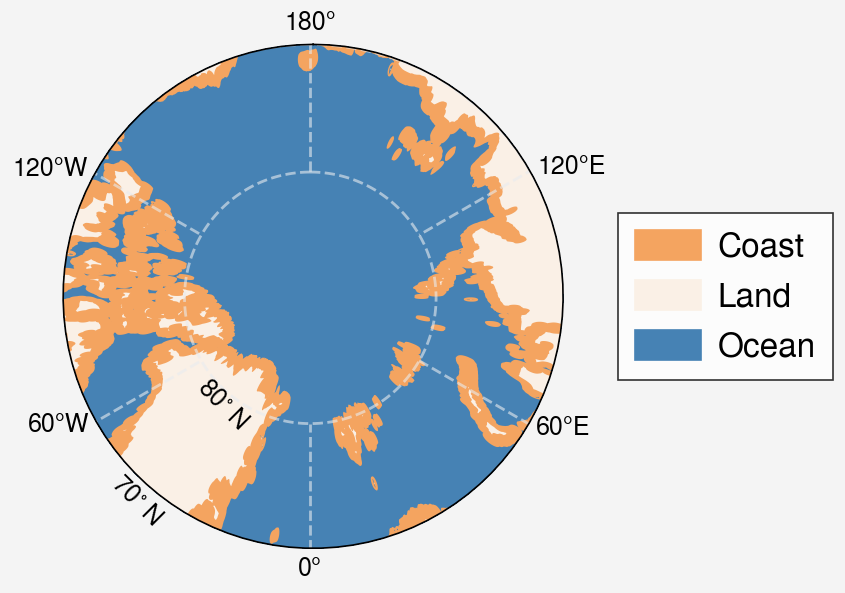

In [4]:
fig, axs = plot.subplots(proj='npstere')

land_c = 'linen'
ocean_c = 'steelblue'#'darkcyan'
coast_c = 'sandybrown'

line_ocean = axs.add_geometries(ocean_polygon,
                                ccrs.PlateCarree(),
                                facecolor=ocean_c,
                                # edgecolor='yellow',
                                # linewidth=0.5,
                               )

line_land = axs.add_geometries(land_polygon,
                                ccrs.PlateCarree(),
                                facecolor=land_c,
                                # edgecolor='yellow',
                                # linewidth=1
                               )

line_coast = axs.add_geometries(coast_polygon,
                                ccrs.PlateCarree(),
                                facecolor=coast_c,
                                # edgecolor='yellow',
                                # linewidth=0.5,
                               )

LegendElement = [
                 mpatches.Patch(color=coast_c, label='Coast'),
                 mpatches.Patch(color=land_c, label='Land'),
                 mpatches.Patch(color=ocean_c, label='Ocean'),
                ]
axs.legend(handles = LegendElement, loc='r', ncols=1, prop={'size': 12})

axs.format(boundinglat=70, latlines=10, lonlabels='lrbt', gridcolor='gray2', gridlinewidth=1, gridalpha=0.6, gridlinestyle='--')
axs.text(-42, 66, '70$^{\circ}$ N', rotation=-45, transform=ccrs.PlateCarree())
axs.text(-42, 76, '80$^{\circ}$ N', rotation=-45, transform=ccrs.PlateCarree())

fig.savefig('../figures/arctic_region_mask.png')